# This Notebooks is part of the project, "Predicting the price of houses in US"  

In [1]:
# to install the necessary packages, run the following command:

_ = !pip install -r ../requirements.txt


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### 0 - Loading the data

In [3]:
#defining the path to the dataset
path = '../src/data/raw/challenge_houses-prices.csv'

#reading the dataset
df = pd.read_csv(path)

#checking the first 5 rows, describing the dataset and transposing the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
property_area,50000.0,2524.552460,778.920151,334.0,1891.00,2424.0,3040.00,5733.0
house_age,50000.0,38.483060,30.332100,0.0,9.00,38.0,55.00,138.0
overall_quality,50000.0,6.155640,1.121054,2.0,5.00,6.0,7.00,10.0
overall_condition,50000.0,5.468320,0.866401,2.0,5.00,5.0,6.00,9.0
spaciousness,50000.0,224.277220,48.212846,104.0,185.00,218.0,256.00,417.0
liv_lot_ratio,50000.0,0.015560,0.123767,0.0,0.00,0.0,0.00,1.0
remodel_age,50000.0,22.595220,21.036176,-1.0,4.00,13.0,40.00,60.0
bath_area,50000.0,2.160280,0.677541,1.0,2.00,2.0,2.50,4.3
bsmt_area,50000.0,1037.621180,375.441778,0.0,759.00,919.0,1298.00,4281.0
garage_area,50000.0,473.134220,196.493639,0.0,313.00,483.0,572.00,1169.0


In [4]:
#save an example of the one row of the dataset
example = df.iloc[0]
#create a json file with the example
example.to_json()
example.to_json('../src/data/raw/example.json', orient='index')


### 1 - EDA (Exploratory Data Analysis)

In [5]:
print(f"The Dataframe shape is: {df.shape}")

#checking the first 5 rows
print(f"The first 5 rows are:")
df.head()

The Dataframe shape is: (50000, 18)
The first 5 rows are:


,property_area,house_age,house_style,neighborhood,overall_quality,overall_condition,spaciousness,liv_lot_ratio,remodel_age,bath_area,bsmt_area,garage_area,garage_age,has_2ndfloor,has_porch,has_pool,has_multiple_kitchen,sale_price
0,2501,12,2Story,Gilbert,6,5,207.0,0.0,15,2.5,775,386,12.0,1,1,0,0,110000
1,1704,87,1.5Fin,OldTown,6,7,225.0,0.0,19,1.5,666,261,82.0,1,1,0,0,145203
2,2253,92,1.5Fin,OldTown,5,7,203.0,1.0,57,2.0,625,57,NaN,1,1,0,0,120359
3,1788,75,1Story,BrkSide,5,7,165.0,0.0,59,1.0,838,228,89.0,0,1,0,0,92758
4,1361,42,1Story,Edwards,5,5,191.0,0.0,52,1.0,645,457,50.0,0,1,0,0,114073


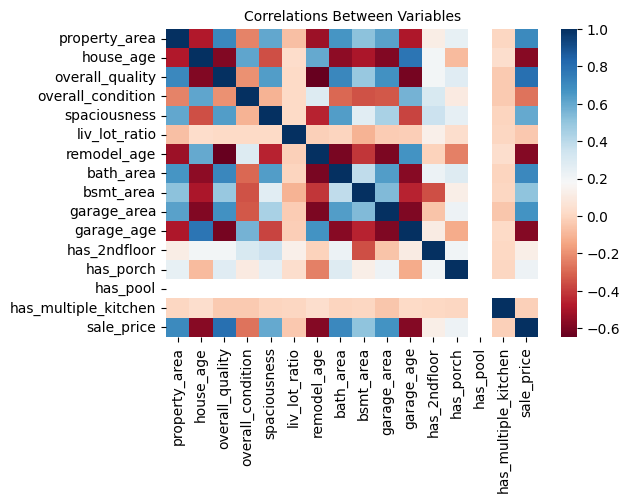

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=10)
plt.show()

col_0,% observations
house_style,
1.5Fin,0.10222
1Story,0.54976
2.5Unf,0.00030
2Story,0.32546
SFoyer,0.00186
SLvl,0.02040


col_0,% observations
neighborhood,
Blmngtn,0.00100
Blueste,0.00004
BrDale,0.00756
BrkSide,0.01906
ClearCr,0.00312
CollgCr,0.18242
Crawfor,0.02398
Edwards,0.04294
Gilbert,0.04608


,property_area,house_age,overall_quality,overall_condition,spaciousness,liv_lot_ratio,remodel_age,bath_area,bsmt_area,garage_area,garage_age,has_2ndfloor,has_porch,has_pool,has_multiple_kitchen,sale_price
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49197.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000
mean,2524.552460,38.48306,6.155640,5.468320,224.277220,0.015560,22.595220,2.160280,1037.621180,473.134220,29.538204,0.432120,0.948160,0.0,0.001220,178289.157540
std,778.920151,30.33210,1.121054,0.866401,48.212846,0.123767,21.036176,0.677541,375.441778,196.493639,24.152324,0.495376,0.221706,0.0,0.034908,69347.025046
min,334.000000,0.00000,2.000000,2.000000,104.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34900.000000
25%,1891.000000,9.00000,5.000000,5.000000,185.000000,0.000000,4.000000,2.000000,759.000000,313.000000,7.000000,0.000000,1.000000,0.0,0.000000,127432.750000
50%,2424.000000,38.00000,6.000000,5.000000,218.000000,0.000000,13.000000,2.000000,919.000000,483.000000,28.000000,0.000000,1.000000,0.0,0.000000,158564.500000
75%,3040.000000,55.00000,7.000000,6.000000,256.000000,0.000000,40.000000,2.500000,1298.000000,572.000000,46.000000,1.000000,1.000000,0.0,0.000000,221828.250000
max,5733.000000,138.00000,10.000000,9.000000,417.000000,1.000000,60.000000,4.300000,4281.000000,1169.000000,107.000000,1.000000,1.000000,0.0,1.000000,675054.000000


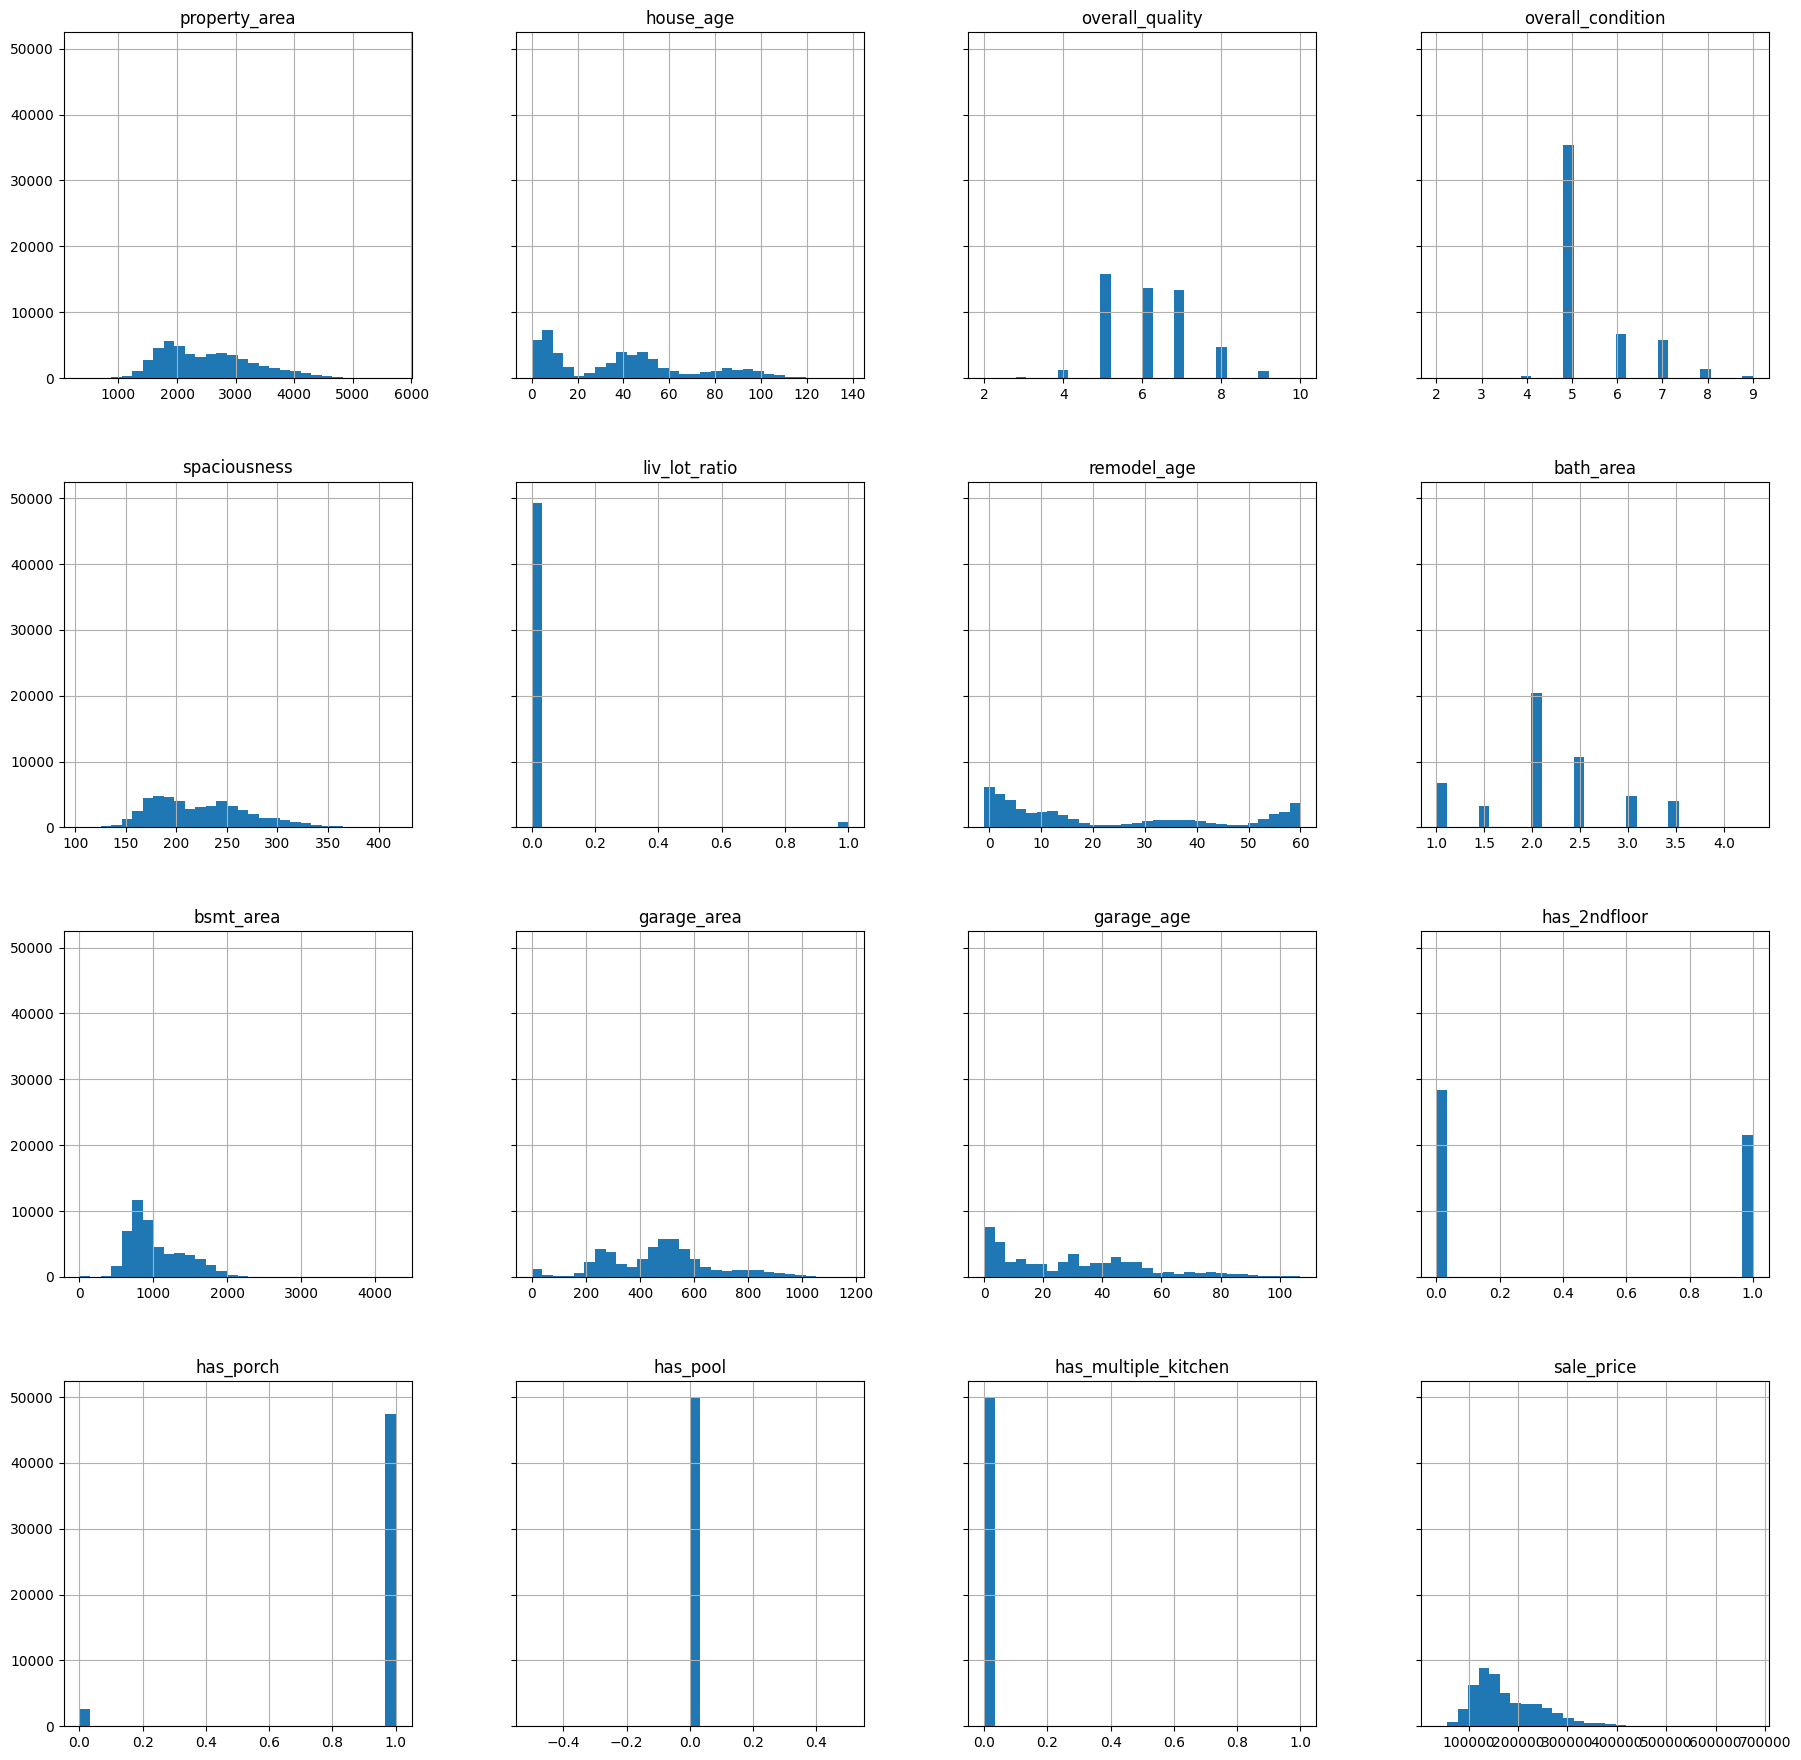

In [7]:
from IPython.display import display

# Frequency tables for each categorical feature
for column in df.select_dtypes(include=["object"]).columns:
    display(pd.crosstab(index=df[column], columns="% observations", normalize="columns"))

# Histograms for each numeric features
display(df.describe())
%matplotlib inline
hist = df.hist(bins=30, sharey=True, figsize=(22, 22))


In [5]:
df.dtypes

property_area             int64
house_age                 int64
house_style              object
neighborhood             object
overall_quality           int64
overall_condition         int64
spaciousness            float64
liv_lot_ratio           float64
remodel_age               int64
bath_area               float64
bsmt_area                 int64
garage_area               int64
garage_age              float64
has_2ndfloor              int64
has_porch                 int64
has_pool                  int64
has_multiple_kitchen      int64
sale_price                int64
dtype: object

In [8]:
import re

# define target column, and retrieve list of attributes from the dataframe
id_cols = [] #If the dataset has an ID column, it should be included here
target_col = 'sale_price'
categ_cols = ['overall_quality', 'overall_condition','liv_lot_ratio'] #If the dataset has known categorical columns, they should be included here
other_cols = [] #If the dataset has other columns that should not be included in the model, they should be included here

feature_cols = [x for x in df.columns.tolist() if x not in id_cols + other_cols + [target_col]]

numeric_features = [x for x in feature_cols if df[x].dtype != 'object' and not re.match('(^has_)', x) and x not in categ_cols]

categorical_features = [x for x in feature_cols if x not in numeric_features]

# check feature columns
print('Number of feature cols: {}'.format(len(feature_cols)))
print('Number of categoric features: {}'.format(len(categorical_features)))
print('Number of numeric features: {} \n'.format(len(numeric_features)))
print('The numeric features are: \n {} \n'.format(numeric_features))
print('The categorical features are: \n {}'.format(categorical_features))

Number of feature cols: 17
Number of categoric features: 9
Number of numeric features: 8 

The numeric features are: 
 ['property_area', 'house_age', 'spaciousness', 'remodel_age', 'bath_area', 'bsmt_area', 'garage_area', 'garage_age'] 

The categorical features are: 
 ['house_style', 'neighborhood', 'overall_quality', 'overall_condition', 'liv_lot_ratio', 'has_2ndfloor', 'has_porch', 'has_pool', 'has_multiple_kitchen']


In [9]:
#show the number of missing values for each column
df.isnull().sum()


property_area             0
house_age                 0
house_style               0
neighborhood              0
overall_quality           0
overall_condition         0
spaciousness              0
liv_lot_ratio             0
remodel_age               0
bath_area                 0
bsmt_area                 0
garage_area               0
garage_age              803
has_2ndfloor              0
has_porch                 0
has_pool                  0
has_multiple_kitchen      0
sale_price                0
dtype: int64

### note: the dataset contains 50000 observations and 18 columns, 17 features, 8 numerical, 9 categorical and 1 target, the price of the house.

### 2 - Data Preprocessing


In [10]:
# Imputing missing values
from sklearn.impute import SimpleImputer

# Imputing missing values for numeric features
imputer = SimpleImputer(strategy='median')
df[numeric_features] = imputer.fit_transform(df[numeric_features])
df[numeric_features].head(2)

,property_area,house_age,spaciousness,remodel_age,bath_area,bsmt_area,garage_area,garage_age
0,2501.0,12.0,207.0,15.0,2.5,775.0,386.0,12.0
1,1704.0,87.0,225.0,19.0,1.5,666.0,261.0,82.0


In [25]:
# X and y definition

X = df[feature_cols]
y = df[target_col]

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Encoding categorical features

Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1)

source: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [13]:
#import libraries

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [14]:
 #define enconders

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
scaler = StandardScaler()


### Define a pipeline to clean the data and encode the categorical features and scale the numerical features


In [15]:
preprocessor = ColumnTransformer(
   transformers=[
   ('ordinal_encoder', ordinal_encoder, categorical_features),
   ('scaler', scaler, numeric_features),
],remainder='passthrough') 

In [16]:
#fit the preprocessor to the training data
X_train_tf = preprocessor.fit_transform(X_train)

#add the transformed columns to the dataframe
X_train_tf = pd.DataFrame(X_train_tf, columns=X_train.columns.tolist())
X_train_tf.head()

,property_area,house_age,house_style,neighborhood,overall_quality,overall_condition,spaciousness,liv_lot_ratio,remodel_age,bath_area,bsmt_area,garage_area,garage_age,has_2ndfloor,has_porch,has_pool,has_multiple_kitchen
0,3.0,12.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,-0.794538,0.645393,0.950977,0.971162,-0.977170,-1.020783,-1.023372,0.439760
1,3.0,18.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,2.787758,1.501760,0.058409,0.543237,-0.237103,-0.759687,-2.407693,0.147617
2,1.0,12.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.111655,0.513644,-0.377497,-0.217519,-0.237103,0.766928,-0.025846,1.065781
3,3.0,12.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,-0.987619,-0.210974,0.369770,0.495690,-0.977170,-0.951512,-1.196412,0.398025
4,1.0,12.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.215919,0.118398,-0.875675,0.305501,-0.237103,-0.341400,-0.168350,0.940577


In [17]:
# save the preprocessor
import pickle
import json
pickle.dump(preprocessor, open('../src/models/preprocessor.pkl', 'wb'))
# save column names in json file
with open('../src/models/columns.json', 'w') as f:
    json.dump(X_train.columns.tolist(), f)

    

In [18]:
# load the preprocessor
import pickle
preprocessor = pickle.load(open('../src/models/preprocessor.pkl', 'rb'))

In [19]:
X_test_tf = preprocessor.transform(X_test)

#add the transformed columns to the dataframe
X_test_tf = pd.DataFrame(X_test_tf, columns=X_test.columns.tolist())
X_test_tf.head()

,property_area,house_age,house_style,neighborhood,overall_quality,overall_condition,spaciousness,liv_lot_ratio,remodel_age,bath_area,bsmt_area,garage_area,garage_age,has_2ndfloor,has_porch,has_pool,has_multiple_kitchen
0,1.0,12.0,3.0,5.0,0.0,0.0,1.0,0.0,0.0,-0.288666,0.151335,-1.207793,-0.835633,-0.237103,-0.802315,-0.153082,0.439760
1,1.0,16.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0,0.865958,-1.232028,0.515072,-0.835633,1.243032,1.832627,2.508683,-1.229630
2,1.0,12.0,4.0,3.0,0.0,1.0,1.0,0.0,0.0,-0.122616,0.316021,0.826433,-0.883181,0.502964,0.135501,0.798639,-0.061057
3,1.0,12.0,3.0,5.0,0.0,0.0,1.0,0.0,0.0,-0.463726,0.480707,-1.373852,1.779465,-0.237103,-0.956841,-0.814706,1.691802
4,1.0,5.0,5.0,3.0,0.0,0.0,1.0,0.0,0.0,0.201760,-0.935593,-0.668100,-0.407708,-0.237103,0.742949,0.406754,-0.937487


In [26]:
# Save the preprocessed data in parquet format to save space and to be used in the next notebook

X_train_tf.to_parquet('../src/data/processed/X_train_tf.parquet')
X_test_tf.to_parquet('../src/data/processed/X_test_tf.parquet')

#change series to dataframe
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

y_train.to_parquet('../src/data/processed/y_train.parquet')
y_test.to_parquet('../src/data/processed/y_test.parquet')


### 3 - Model Selection
    

In [39]:
# Load the preprocessed data
X_train_tf = pd.read_parquet('../src/data/processed/X_train_tf.parquet')
X_test_tf = pd.read_parquet('../src/data/processed/X_test_tf.parquet')
y_train = pd.read_parquet('../src/data/processed/y_train.parquet')
y_test = pd.read_parquet('../src/data/processed/y_test.parquet')

In [36]:
# create a xgbost regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()

# fit the model
xgb.fit(X_train_tf, y_train)

print("Model trained")


Model trained


In [35]:
# create a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# fit the model
rf.fit(X_train_tf, y_train)

print("Model trained")

Model trained


In [ ]:
# save the model to disk
with open('../src/models/model.pkl', 'wb') as f:
    pickle.dump(rf, f)

### 4 - Model Evaluation


In [41]:
# evaluate the model
from sklearn.metrics import mean_absolute_error

# predict the test set
y_pred = rf.predict(X_test_tf)


print("-----------------------------")
print("Random Forest Regressor")
print("-----------------------------")
test_rmae = np.sqrt(mean_absolute_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
print("Test  RMAE (Root Mean Squared Error): %s" % test_rmae)
print("Test  MAE (Mean Absolute Error): %s" % test_mae)

y_pred = rf.predict(X_train_tf)
train_rmae = np.sqrt(mean_absolute_error(y_train, y_pred))
train_mae = mean_absolute_error(y_train, y_pred)
print("Train RMAE (Root Mean Squared Error): %s" % train_rmae)
print("Train MAE (Mean Absolute Error): %s" % train_mae)


# predict the test set
y_pred = xgb.predict(X_test_tf)

print("-----------------------------")
print("XGBoost Regressor")
print("-----------------------------")
test_rmae = np.sqrt(mean_absolute_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
print("Test  RMAE (Root Mean Squared Error): %s" % test_rmae)
print("Test  MAE (Mean Absolute Error): %s" % test_mae)
y_pred = xgb.predict(X_train_tf)
train_rmae = np.sqrt(mean_absolute_error(y_train, y_pred))
train_mae = mean_absolute_error(y_train, y_pred)
print("Train RMAE (Root Mean Squared Error): %s" % train_rmae)
print("Train MAE (Mean Absolute Error): %s" % train_mae)

-----------------------------
Random Forest Regressor
-----------------------------
Test  RMAE (Root Mean Squared Error): 163.1448178030795
Test  MAE (Mean Absolute Error): 26616.231576000002
Train RMAE (Root Mean Squared Error): 98.98452793366245
Train MAE (Mean Absolute Error): 9797.936770250002
-----------------------------
XGBoost Regressor
-----------------------------
Test  RMAE (Root Mean Squared Error): 162.91479596086032
Test  MAE (Mean Absolute Error): 26541.23074296875
Train RMAE (Root Mean Squared Error): 148.11846270219564
Train MAE (Mean Absolute Error): 21939.07899326172


### 5 - Model Tuning

In [45]:
# model tuning

# Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [100, 500, 1000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
max_depth = [10, 50, 100]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
scores = cross_val_score(rf, X_train_tf, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Mean MAE: %s" % scores.mean())
print("Std MAE: %s" % scores.std())



Mean MAE: -26458.128289499997
Std MAE: 272.40431696027395


In [52]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = 3)
warnings.filterwarnings('ignore')

# Fit the random search model
rf_random.fit(X_train_tf, y_train)

print("Best parameters: %s" % rf_random.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimat

[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.3s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.6s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.6s
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [53]:
# save the best parameters

print("Best parameters: %s" % rf_random.best_params_)
best_params = rf_random.best_params_

with open('../src/models/best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)
    

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [55]:
# train the model with the best parameters

rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                            max_features=best_params['max_features'],
                            max_depth=best_params['max_depth'],
                            min_samples_split=best_params['min_samples_split'],
                            min_samples_leaf=best_params['min_samples_leaf'],
                            bootstrap=best_params['bootstrap'])

# fit the model
rf.fit(X_train_tf, y_train)

print("Model trained")

# evaluate the model

# predict the test set
y_pred = rf.predict(X_test_tf)

#save the model to disk
with open('../src/models/model.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("-----------------------------")
print("Random Forest Regressor")
print("-----------------------------")
test_rmae = np.sqrt(mean_absolute_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
print("Test  RMAE (Root Mean Squared Error): %s" % test_rmae)
print("Test  MAE (Mean Absolute Error): %s" % test_mae)

Model trained
-----------------------------
Random Forest Regressor
-----------------------------
Test  RMAE (Root Mean Squared Error): 161.37560152428514
Test  MAE (Mean Absolute Error): 26042.084767324865


### 6 - Make predictions

In [56]:


# load the model from disk
with open('../src/models/model.pkl', 'rb') as f:
    model = pickle.load(f)


#load example data json
with open('../src/data/raw/example.json', 'r') as f:
    data = json.load(f)

# convert json to dataframe
df = pd.DataFrame(data, index=[0])

# preprocess the data
X_test_tf = preprocessor.transform(df)

# predict the test set
y_pred = model.predict(X_test_tf)

print("The price of the house is: ${}".format(y_pred[0]))

The price of the house is: $147743.6086813664
